In [23]:
# General Libs
from keras.models import load_model
import numpy as np
from keras.datasets import mnist
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error, root_mean_squared_error
import tensorflow as tf

In [24]:
# Load the model
model = load_model('simple_diffusion_model.keras')

In [5]:
# load the data
(X_train, _), (X_test, _) = mnist.load_data()

# Reshape and normalize data
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)) / 255.0
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)) / 255.0

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [7]:
# add noise to the data
def add_noise(img, sigma=0.4):
    noise = np.random.normal(0, sigma, img.shape)
    imgs_with_noise = np.clip(img + noise, 0.0, 1.0)
    return imgs_with_noise


noisy_X_train = add_noise(X_train)
noisy_X_test = add_noise(X_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 22s 66ms/step


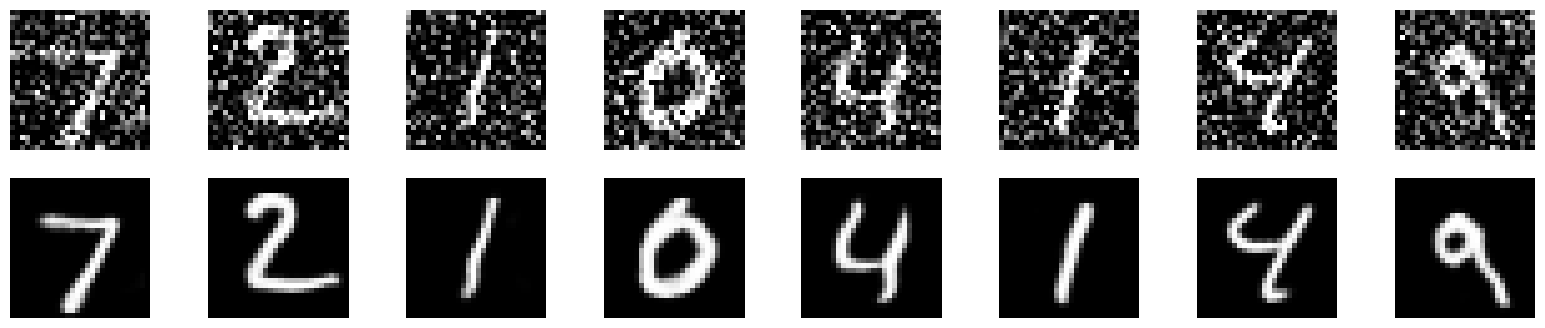

In [9]:
# predict and plot the data
pred = model.predict(noisy_X_test)

plt.figure(figsize=(20, 4))
n = 8
for i in range(n):
    ax = plt.subplot(2, n, i+1)
    plt.imshow(noisy_X_test[i], cmap="gray")
    plt.axis("off")
    ax = plt.subplot(2, n, i+1+n)
    plt.imshow(pred[i], cmap="gray")
    plt.axis("off")

plt.show()

In [22]:
# evaluate metrics
mse_val = mean_squared_error(X_test.flatten(), pred.flatten())
rmse_val = root_mean_squared_error(X_test.flatten(), pred.flatten())
psnr_val = tf.image.psnr(X_test, pred, max_val=1.0)

print("MSE:", mse_val)
print("RMSE:", rmse_val)
print("PSRN:", np.mean(psnr_val))

MSE: 0.006913740777427288
RMSE: 0.08314890725335654
PSRN: 21.92468


- The above metrics were used based on the article: [Image Quality Assessment through FSIM, SSIM, MSE, and PSNR—A Comparative Study](https://www.scirp.org/journal/paperinformation?paperid=90911)

- The three most commonly used metrics for evaluating image quality were selected:
  - MSE: Calculates the average square of the difference between the actual value and the predicted value. Values closer to zero indicate better quality.

  - RMSE: Derived from MSE, applying the square root of the value obtained.

  - PSNR: Calculates the ratio between the maximum possible signal power and the power of the distortion noise that affects image quality, expressed in decibels. The acceptable range of quality loss is approximately 20 to 25 dB.

- Results obtained: The results of the image quality assessment were: MSE = 0.0069, RMSE = 0.0831, and PSNR = 21.92 dB. These values indicate low reconstruction error (MSE and RMSE close to zero) and acceptable image quality, within the reference range for PSNR (approximately 20–25 dB). This demonstrates that the model was effective for the proposed problem, which consisted of applying noise to images from the MNIST dataset and training a neural network to learn the noise removal pattern, generating clean, high-quality images.